<a href="https://colab.research.google.com/github/Mahmoud0090/deep-learning-models/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# TASK 2 : Clone & Explore dataset

In [8]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 35.65 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [9]:
#set the path to the main dir

main_dir = '/content/datasets/Data'
#set the path to the train dir

train_dir = os.path.join(main_dir , 'train')

#set the path to the test dir

test_dir = os.path.join(main_dir , 'test')

#directory with the training covid images

train_covid_dir = os.path.join(train_dir , 'COVID19')

#directory with the training normal images

train_normal_dir = os.path.join(train_dir , 'NORMAL')

#directory with the testing covid images

test_covid_dir = os.path.join(test_dir , 'COVID19')

#directory with the testing normal images

test_normal_dir = os.path.join(test_dir , 'NORMAL')

In [10]:

print(os.listdir(main_dir))

['train', 'test']


In [11]:
#print the total no of images present in each dir
dirs = [train_covid_dir , train_normal_dir , test_covid_dir , test_normal_dir]

for dir in dirs:
  print(dir, ' number of images is ',len(os.listdir(dir)))

/content/datasets/Data/train/COVID19  number of images is  545
/content/datasets/Data/train/NORMAL  number of images is  1266
/content/datasets/Data/test/COVID19  number of images is  167
/content/datasets/Data/test/NORMAL  number of images is  317


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(260).jpg', '/content/datasets/Data/train/COVID19/COVID19(504).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (263).jpg', '/content/datasets/Data/train/COVID19/COVID19(344).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (9).jpeg', '/content/datasets/Data/train/COVID19/COVID19(510).jpg', '/content/datasets/Data/train/COVID19/COVID19(451).jpg', '/content/datasets/Data/train/COVID19/COVID19(243).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(374).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(732).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(107).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(334).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(700).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(944).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1556).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(60).jpg']


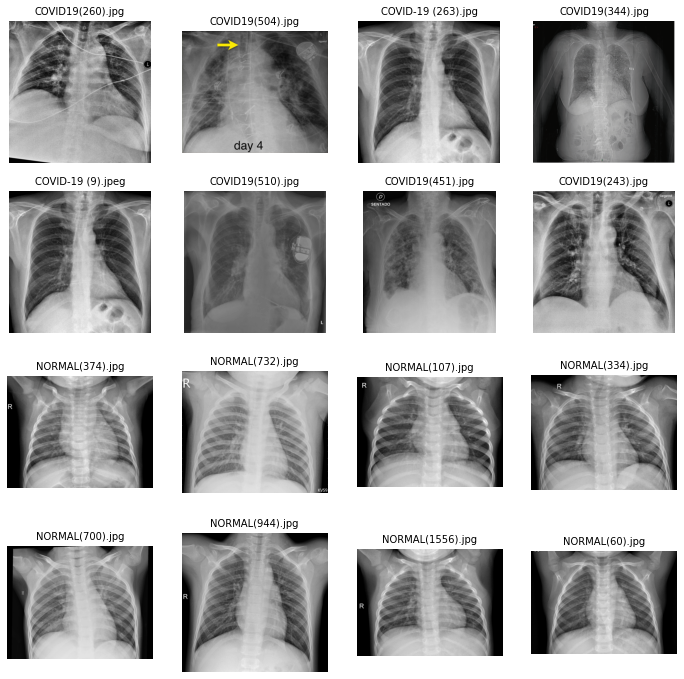

In [12]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12 , 12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir , filename) for filename in (os.listdir(train_covid_dir)[:8])]
normal_pic = [os.path.join(train_normal_dir , filename) for filename in (os.listdir(train_normal_dir)[:8])]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , image_path in enumerate(merged_list):
  name_of_image = image_path.split('/' , 6)[6]
  sp = plt.subplot(rows , cols , i+1)
  sp.axis('Off')
  img = mpimg.imread(image_path)
  sp.set_title(name_of_image , fontsize = 10)
  plt.imshow(img , cmap = 'gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [13]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale=1./255 , 
                                validation_split = 0.2,
                                zoom_range = 0.2 , 
                                horizontal_flip = True)

#dgen_val = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir ,
                                                 target_size = (150 , 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir ,
                                                 target_size = (150 , 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 1449 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [14]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [15]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [19]:
model = tf.keras.models.Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(tf.keras.layers.Conv2D(32 , (3,3) , padding = 'SAME' , activation = 'relu' , input_shape = (150,150,3)))
# pooling layer
model.add(tf.keras.layers.MaxPool2D((2,2)))
# place a dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# add another convolutional layer
model.add(tf.keras.layers.Conv2D(64 , (3,3) , padding = 'SAME' , activation = 'relu'))
# pooling layer
model.add(tf.keras.layers.MaxPool2D((2,2)))
# place a dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# Flatten layer
model.add(tf.keras.layers.Flatten())
# add a dense layer : amount of nodes, activation
model.add(tf.keras.layers.Dense(256 , activation = 'relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

# TASK 6 : Compile & Train the Model

In [22]:
#compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001) , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
#train the model
history = model.fit(train_generator , epochs = 5 , validation_data=test_generator)

Epoch 1/5
46/46 [==============================] - 106s 2s/step - loss: 1.1982 - accuracy: 0.7819 - val_loss: 0.2624 - val_accuracy: 0.9401
Epoch 2/5
46/46 [==============================] - 102s 2s/step - loss: 0.2315 - accuracy: 0.9158 - val_loss: 0.1865 - val_accuracy: 0.9339
Epoch 3/5
46/46 [==============================] - 102s 2s/step - loss: 0.1492 - accuracy: 0.9531 - val_loss: 0.1346 - val_accuracy: 0.9525
Epoch 4/5
46/46 [==============================] - 102s 2s/step - loss: 0.1323 - accuracy: 0.9593 - val_loss: 0.1518 - val_accuracy: 0.9463
Epoch 5/5
46/46 [==============================] - 103s 2s/step - loss: 0.1188 - accuracy: 0.9551 - val_loss: 0.1271 - val_accuracy: 0.9545


# TASK 7 : Performance Evaluation

In [25]:
#get the keys of history object

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

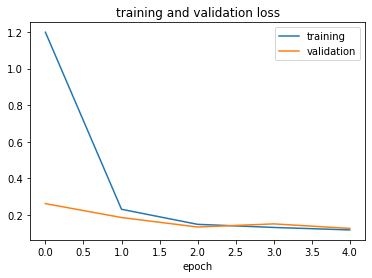

In [26]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training' , 'validation'])
plt.title('training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

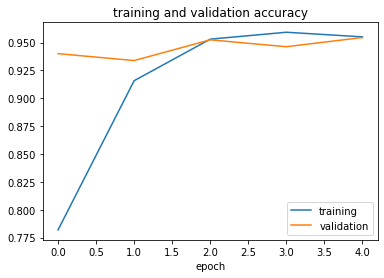

In [29]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training' , 'validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')

In [28]:
# get the test acuarcy and loss
model.evaluate(test_generator)

16/16 [==============================] - 15s 897ms/step - loss: 0.1271 - accuracy: 0.9545


[0.12707316875457764, 0.9545454382896423]

# TASK 8 : Prediction On New Data

In [36]:
from google.colab import files
from tensorflow.keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path , target_size = (150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis=0)
  prediction = model.predict(img)
  print(filename)

  if prediction == 0 :
    print('covid detected')
  else:
    print('healthy')

Saving covid1.jpg to covid1 (3).jpg
Saving covid2.jpeg to covid2 (3).jpeg
Saving normal1.jpg to normal1 (3).jpg
Saving normal2.jpg to normal2 (3).jpg
covid1.jpg
covid detected
covid2.jpeg
covid detected
normal1.jpg
healthy
normal2.jpg
healthy
